# Modules
## Using modules
A python module is non other than a bunch of functions and classes, packed together. You can write your own module also, which can be used by others. Any `.py` file can be used as a module.

### Import
If Python is installed, we have the built-in modules. It is simple to import them. We did it a few times.

In [1]:
import sys
print(sys.path)

['/home/wettl/bin/p3/lib/python36.zip', '/home/wettl/bin/p3/lib/python3.6', '/home/wettl/bin/p3/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '', '/home/wettl/bin/p3/lib/python3.6/site-packages', '/home/wettl/bin/p3/lib/python3.6/site-packages/IPython/extensions', '/home/wettl/.ipython']


`sys` is a built-in module, it is installed by default.
This module can access system files and variables (for example command line arguments).

The `sys.path` is a variable containing a list of strings that specifies the search path for modules. 

You can import a whole modul a submodule or only one function from a module. The most frequently used commands for importing modules or a part of them:
```Python
import <modul>
import <modul> as <name>
from <modul> import <identifier>
from <modul.identifier> import <identifier>
```
E.g.:

In [2]:
from csv import reader
from itertools import permutations
for p in permutations(['A', 'B', 'C']):
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


### Relative import
You can import files from the current directory.
Write the next code into a file named `myfns.py`:
```Python
def foo():
    print("FoO")

def bar():
    print("BaR")
```
After this we may import this by
```Python
import myfns
```
We can import one function only:

In [3]:
from myfns import foo
foo()

FoO


## `numpy` basics
`numpy` is a [module](https://numpy.org/) for numerical calculations. It can handle vectors, matrices, arrays and perform linear algebraic calculations, random number generation...

If you have [Anaconda](https://www.anaconda.com/products/individual)
then it is installed by default.

You can import a module with an alternative name, just to make it shorter.
```Python
import numpy as np
```

The main object of numpy is `ndarray`, short for *n-dimensional array*, you can create arrays with the
`numpy.array` function. This construct from a list of lists a 2D array, from a list of lists of lists a 3D array...
The other important function is `arange`, which makes an array similarly to `range`. A range can be reshape by the `reshape` function:

In [4]:
import numpy as np
x = np.arange(1, -1, -0.2)
y = np.array([[1, 2, 3], [1, 2, 4]])
z = np.arange(8).reshape(2, 2, 2)

In [5]:
print(x)
print(y)
print(z)

[ 1.00000000e+00  8.00000000e-01  6.00000000e-01  4.00000000e-01
  2.00000000e-01  2.22044605e-16 -2.00000000e-01 -4.00000000e-01
 -6.00000000e-01 -8.00000000e-01]
[[1 2 3]
 [1 2 4]]
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


In [6]:
print(x.dtype, y.dtype, z.dtype)
print(x.ndim, y.ndim, z.ndim)
print(x.shape, y.shape, z.shape)

float64 int64 int64
1 2 3
(10,) (2, 3) (2, 2, 2)


You can perform **elementwise** operations (`+ - * / **`) between `numpy.ndarray` type objects if they are are compatible.

In [7]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(a + b)
print(a - b)
print(b / (b+1.0))

[20 31 42 53]
[20 29 38 47]
[0.         0.5        0.66666667 0.75      ]


You can add a number to an array which means adding the same number to all of the elements.
Same for multiplication and other operations between an array and an element.

In [8]:
b = np.arange(10)
print(b)
print(b ** 2)
print(b + 10)
print(b % 3 == 1)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]
[10 11 12 13 14 15 16 17 18 19]
[False  True False False  True False False  True False False]


The matrix __dot product is not the `*`__ operator, but the `@` operation or the `.dot` method:

In [9]:
A = np.arange(2, 6).reshape(2, 2)
B = np.arange(3, -1, -1).reshape(2, 2)
print(A)
print(B)

[[2 3]
 [4 5]]
[[3 2]
 [1 0]]


In [10]:
print(A * B)     # elementwise
print(A @ B)     # matrix product
print(A.dot(B))  # matrix product

[[6 6]
 [4 0]]
[[ 9  4]
 [17  8]]
[[ 9  4]
 [17  8]]


You can use the normal indexing, but there are some other comfortable possibilities:

In [11]:
x = np.arange(15).reshape(3, 5)
print(x)
print(x[0:2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


Or you can take certain columns:

In [12]:
print(x[2, :3])
print(x[:, 3]) 

[10 11 12]
[ 3  8 13]


But if you want to get a column vector (as a 2D array) use `[ ]`:

In [13]:
print(x[:, [3]])

[[ 3]
 [ 8]
 [13]]


You can use a list of indices which slices the corresponding rows (or columns).

In [14]:
a = np.arange(12)**2
i = np.array([1, 5, 1, 3, 8])
print(a[i])

[ 1 25  1  9 64]


You can call a `numpy` function with an array parameter which performs (mostly) elementwise operation.

Numpy can calculate mean and standard deviation.

In [15]:
x = np.log(np.arange(2, 10, 0.5))
print(x)
print(x.sum())
print(x.mean())
print(x.std())

[0.69314718 0.91629073 1.09861229 1.25276297 1.38629436 1.5040774
 1.60943791 1.70474809 1.79175947 1.87180218 1.94591015 2.01490302
 2.07944154 2.14006616 2.19722458 2.2512918 ]
26.457769829012314
1.6536106143132696
0.4600673068044455


To make an array filled with zeros or ones you can call `zeros` or `ones` (similarly to MatLab/Octave, the matrix based languages).
The  function `eye` construct identity matrix (`I` pronounced as `eye`).

In [16]:
print(np.zeros([2, 3]))
print(np.ones([3, 1]))      # float type
print(np.eye(4, dtype=int)) # int type

[[0. 0. 0.]
 [0. 0. 0.]]
[[1.]
 [1.]
 [1.]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


You can generate random numbers or array of numbers. The next function generate them with uniform distribution from $[0,1)$:

In [17]:
np.random.rand(3, 4)

array([[0.97397551, 0.2002247 , 0.05598092, 0.78098815],
       [0.61663275, 0.54883023, 0.53494673, 0.4904273 ],
       [0.85622604, 0.3066138 , 0.25885798, 0.64939544]])

We get the same sequences if we set the `seed`:

In [18]:
np.random.seed(2)
np.random.rand(2, 3)

array([[0.4359949 , 0.02592623, 0.54966248],
       [0.43532239, 0.4203678 , 0.33033482]])

You can generate uniform numbers drawn from $[-2, 2]$ in two ways:

In [19]:
print(np.random.rand(10)*4 - 2)
print(np.random.uniform(size=10, high=2, low=-2))

[-1.18140546  0.47708387 -0.80138131 -0.9326909   0.48453533  0.11656838
 -1.46168022  0.05431249 -1.26224054  1.14134059]
[ 1.41590117 -0.02305265  1.38624594 -1.68141809  0.02098436 -1.73885398
 -0.28751069 -1.61387634 -1.49136011  0.38698124]


We can generate integer sequences. E.g. let us simulate 10 dice rolls:

In [20]:
np.random.randint(1,7,10)

array([3, 5, 3, 2, 1, 3, 6, 3, 2, 6])

## Plot
The `matplotlib` [module](https://matplotlib.org/) used for plotting functions. (The `%matplotlib` *magic* function activates matplotlib interactive support. Magics are functions of the IPython distribution offering support for users of Python. `jupyter` uses most of them.)

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

A simple plot first. If you don't specify the $x$ values, the range $[0, 1, 2 \ldots]$ is used instead.

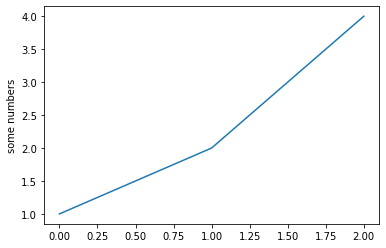

In [22]:
plt.plot([1,2,4])
plt.ylabel('some numbers')
plt.show()

These libraries cannot calculate symbolically, like Sage, just makes a series of lines between the plotted points.

Let's plot a sine curve with `np.sin` function. Here we generate 
the $x$-values with the function `linespace`, which divides an interval into equal parts:

In [23]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Draw with calculating sin at 11 points only:

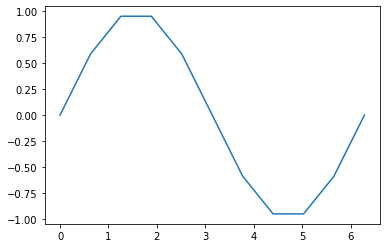

In [24]:
plt.plot(np.linspace(0, 2*np.pi, 11), 
         np.sin(np.linspace(0, 2*np.pi, 11)))
plt.show()

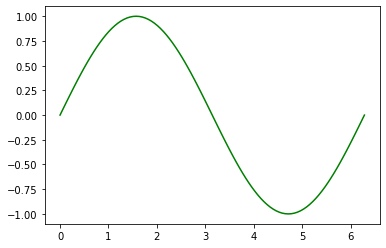

In [25]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'g')
plt.show()

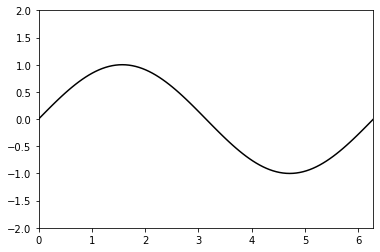

In [26]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'k')
plt.axis([0, 2*np.pi, -2, 2])
plt.show()

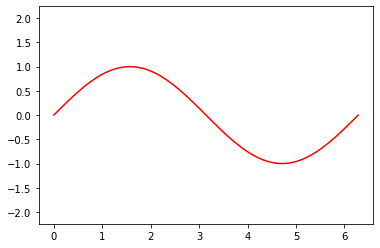

In [27]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'r')
plt.axis('equal')
plt.show()

### Monte–Carlo-method
Monte–Carlo simulation is an easy but not too fast way to estimate an integral.

To calculate $\int_{-2}^2e^{-x^2}\,\mathrm{d}x$ you draw random points in the rectangle $[-2,2]\times[0,1]$ and count how
many points fell under the graph: $e^{-x^2} > y$. In the array `J` we store the indexes of these $(x,y)$ points.

The ratio of the points under the curve times the size of the rectangle is an approximation of the area.

First let us study the function `where`:

In [28]:
a = np.arange(4).reshape(2, 2)
print(a)
print((np.where(a % 2)))
b = np.arange(4)
print(b)
print((np.where(b % 2)))

[[0 1]
 [2 3]]
(array([0, 1]), array([1, 1]))
[0 1 2 3]
(array([1, 3]),)


In [29]:
n = 500000
X = np.random.rand(n, 2)
X[:, 0] = X[:, 0]*4 - 2
J = np.where(X[:, 1] < np.exp(-X[:, 0]**2))[0]
print(4 * len(J) / n)

1.75776


In a picture:

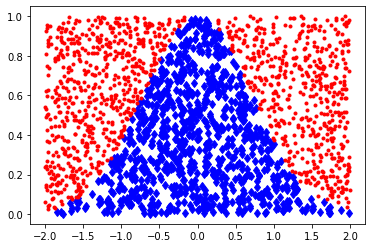

In [30]:
Xp = X[:2000]
Ip = [i for i in range(2000) if i in J]
Inp = [i for i in range(2000) if i not in J]
plt.plot(Xp[Ip, 0], Xp[Ip, 1], 'bd', Xp[Inp, 0], Xp[Inp, 1], 'r.')
plt.show()